## Titanic dataset
### Feature Engineering and Feature Selection
### Logistic Regression

Link:  
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-28.html

#### Data Dictionary

Variable |	Definition  | Key
 --- |---| ---
survival | Survival	  |  0 = No, 1 = Yes  
pclass|Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd  
sex	|       Sex	
Age |	        Age in years	
sibsp	|    # of siblings / spouses aboard the Titanic	
parch	|    # of parents / children aboard the Titanic	
ticket	|    Ticket number	
fare	|    Passenger fare	
cabin	|    Cabin number	
embarked|	Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton



pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')
test.columns = test.columns.str.lower()
train.columns = train.columns.str.lower()
df=[train, test]

In [3]:
train.columns.to_series().groupby(train.dtypes).groups

{dtype('int64'): Index(['passengerid', 'survived', 'pclass', 'sibsp', 'parch'], dtype='object'),
 dtype('float64'): Index(['age', 'fare'], dtype='object'),
 dtype('O'): Index(['name', 'sex', 'ticket', 'cabin', 'embarked'], dtype='object')}

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Tittle
Introduce new column title (from title in name column)
drop column name

In [6]:
for d in df:
    d['title']=d.name.str.extract(' ([A-Za-z]+)\.',expand=False)

In [7]:
train.title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Don           1
Lady          1
Sir           1
Jonkheer      1
Mme           1
Capt          1
Ms            1
Name: title, dtype: int64

In [8]:
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "Countess":   "Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
for d in df:
    d['title']= d.title.map(normalized_titles)
train.title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: title, dtype: int64

In [9]:
title_mapping={
    "Mr" :        0,
    "Miss" :      1,
    "Mrs" :       2,
    "Master" :    3,
    "Royalty" :   4,
    "Officer":    5
}
for dataset in df:
    dataset['title'] =dataset.title.map(title_mapping)

In [10]:
train.title.head(5)

0    0
1    2
2    1
3    2
4    0
Name: title, dtype: int64

In [11]:
train.drop('name',axis=1,inplace=True)
test.drop('name',axis=1,inplace=True)

In [12]:
train.head(3)

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


### Sex
Change to numerical values

In [13]:
sex_mapping={
    'male': 1,
    'female': 0
}
for d in df:
    d.sex =d.sex.map(sex_mapping)

In [14]:
train.head(5)

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0


#### Age
Fill missing age with median age for each title

In [15]:
train[train.age.isna()].head()

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
5,6,0,3,1,NaN,0,0,330877,8.4583,NaN,Q,0
17,18,1,2,1,NaN,0,0,244373,13.0000,NaN,S,0
19,20,1,3,0,NaN,0,0,2649,7.2250,NaN,C,2
26,27,0,3,1,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,0,NaN,0,0,330959,7.8792,NaN,Q,1


In [16]:
train.age.fillna(train.groupby(by =train.title)['age'].transform('median'), inplace=True)
test.age.fillna(test.groupby(by =test.title)['age'].transform('median'), inplace=True)

In [17]:
train.groupby('title')['age'].transform('median').head(5)

0    30.0
1    35.0
2    21.0
3    35.0
4    30.0
Name: age, dtype: float64

In [18]:
train[train.age.isna()]

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title


#### Age binning

In [19]:
for d in df:
    d.loc[d.age<=16, 'age']=0
    d.loc[(d.age>16) & (d.age<=26), 'age']=1,
    d.loc[(d.age>26) & (d.age<=36), 'age']=2,
    d.loc[(d.age>36) & (d.age<=62), 'age']=3,
    d.loc[d.age>62, 'age']=4
train.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,0


### Embarked
Impute NaN values with 'S'  
Change to numerical values

In [20]:
train[train.embarked.isna()]

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
61,62,1,1,0,3.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,0,3.0,0,0,113572,80.0,B28,NaN,2


In [21]:
for d in df:
    d['embarked']=d['embarked'].fillna('S')

In [22]:
train[train.embarked.isna()]

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title


In [23]:
embarked_mapping={
    'S': 0,
    'C': 1,
    'Q': 2
}
for d in df:
    d.embarked =d.embarked.map(embarked_mapping)

### Fare
Impute fare NaN values for each pclass

In [24]:
train[train.embarked.isna()]

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title


In [25]:
train.fare.fillna(train.groupby(by =train.pclass)['fare'].transform('median'), inplace=True)
test.fare.fillna(test.groupby(by =test.pclass)['fare'].transform('median'), inplace=True)

### Cabin
Impute NaN values  
Change to numerical values

In [26]:
for d in df:
    d.cabin=d.cabin.str[:1]

In [27]:
cabin_mapping={
    'A': 0,
    'B': 0.4,
    'C': 0.8,
    'D': 1.2,
    'E': 1.6,
    'F': 2,
    'G': 2.4,
    'T': 2.8
}
for d in df:
    d.cabin =d.cabin.map(cabin_mapping)

In [28]:
train.cabin.fillna(train.groupby(by =train.pclass)['cabin'].transform('median'), inplace=True)
test.cabin.fillna(test.groupby(by =test.pclass)['cabin'].transform('median'), inplace=True)

### Family
Add new column

In [29]:
train['familysize']=train.sibsp+train.parch+1
test['familysize']=test.sibsp+test.parch+1

In [30]:
familysize_mapping={
    1: 0,
    2: 0.4,
    3: 0.8,
    4: 1.2,
    5: 1.6,
    6: 2,
    7: 2.4,
    8: 2.8,
    9: 3.2,
    10: 3.6,
    11: 4
}
for d in df:
    d.familysize =d.familysize.map(familysize_mapping)

### Divide datase to data and target

In [31]:
features_drop=['ticket','sibsp','parch']
train= train.drop(features_drop,axis=1)
train=train.drop(['passengerid'],axis=1)
test= test.drop(features_drop,axis=1)

In [32]:
train_data=train.drop('survived', axis=1)
target=train.survived

train_data.shape, target.shape

((891, 8), (891,))

### Logistic regression

In [33]:
# Initialize logistic regression model
log_model = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000)

#### Logistic regression by one feature - 'Sex'

In [34]:
# Train the model
log_model.fit(X = pd.DataFrame(train_data.sex), y = target)

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[1.01628767]
[[-2.44597988]]


In [35]:
# Make predictions
preds = log_model.predict_proba(X= pd.DataFrame(train_data.sex))
preds = pd.DataFrame(preds)
preds.columns = ["Death_prob", "Survival_prob"]

# Generate table of predictions vs Sex
pd.crosstab(train_data.sex, preds.loc[:, "Survival_prob"])

Survival_prob,0.19314664603456397,0.7342488525817924
sex,,
0,0,314
1,577,0


#### Logistic regression by  features - 'pclass','cabin','age','sex'

In [36]:
# Train the model
log_model.fit(X = train_data[['pclass','cabin','age','sex']],
              y = target)

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[4.33635539]
[[-1.1697701   0.04524096 -0.44028145 -2.4760336 ]]


#### Prediction on train data

In [37]:
# Make predictions
preds = log_model.predict(X= train_data[['pclass','cabin','age','sex']])

# Generate table of predictions vs actual
pd.crosstab(preds,target)

survived,0,1
row_0,,
0,473,103
1,76,239


In [38]:
log_model.score(X = train_data[['pclass','cabin','age','sex']] ,
                y = target)

0.7991021324354658

In [39]:
# View confusion matrix
metrics.confusion_matrix(y_true=target,  # True labels
                         y_pred=preds) # Predicted labels

array([[473,  76],
       [103, 239]])

In [40]:
print(metrics.classification_report(y_true=target,
                              y_pred=preds)) 

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

   micro avg       0.80      0.80      0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



#### Prediction on test data

In [41]:
test_preds = log_model.predict(X=test[['pclass','cabin','age','sex']])
pd.DataFrame({"PassengerId":test.passengerid,"Survived":test_preds}).head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### Logistic regression by  features - pclass, sex, age, fare, cabin, embarked, title, familysize

In [42]:
# Train the model
log_model.fit(X = train_data,
              y = target)

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[3.60647612]
[[-1.12049885 -2.26287101 -0.51792158  0.00413445  0.25865749  0.19879274
   0.39644359 -0.73248969]]


In [43]:
# Make predictions
preds = log_model.predict(X= train_data)

# Generate table of predictions vs actual
pd.crosstab(preds,target)

survived,0,1
row_0,,
0,477,92
1,72,250


In [44]:
# View confusion matrix
metrics.confusion_matrix(y_true=target,  # True labels
                         y_pred=preds) # Predicted labels

array([[477,  72],
       [ 92, 250]])

In [45]:
print(metrics.classification_report(y_true=target,
                              y_pred=preds)) 

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       549
           1       0.78      0.73      0.75       342

   micro avg       0.82      0.82      0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.81      0.82      0.81       891



#### Prediction on test data

In [46]:
test_preds = log_model.predict(X=test.iloc[:,1:])
pd.DataFrame({"PassengerId":test.passengerid,"Survived":test_preds}).head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


### Logistic or sigmoid function

$S(t) = \frac{1}{1+eˆ{−t}}$

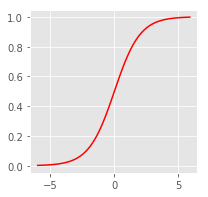

In [47]:
plt.figure(figsize=(3,3))
def sigmoid(t):                          # Define the sigmoid function
    return (1/(1 + np.e**(-t)))    

plot_range = np.arange(-6, 6, 0.1)       
y_values = sigmoid(plot_range)

# Plot curve
plt.plot(plot_range,   # X-axis range
         y_values,     # Predicted values
         color="red")
plt.show()

## Questions:
1. Describe what the sigmoid function defined.  
    Sigmoid function transforms 't' parameter  into range between 0 and 1, than can be interpreted as probability. 
2. When does a sigmoid function output a probability greater than 0.5?
    When 't' parameter is greater than 0.
3. Age is a feature in the titanic data. It has some missing values:
    a. Explain how the missing values are handled in the tutorial
    In tutorial missing values have been replaced with '28', which is are median
    ```python
    # Impute median Age for NA Age values
        new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                                                      28, # Value if check is true
                                    titanic_train["Age"]) # Value if check is false
    ```
    b. Use a numpy function to imputing the missing values in age, to obtain the same results
    Answer in cell below.
4. Do sklearn’s machine learning functions allow for the features to be categorical?
    No. Firstly, strings should convert in integers with LabelEncoder() function, than can be applied OneHotEncoder function.
5. In the tutorial, Label Encoding is used  
    a. Explain the importance of label encoding  
    Label encoding replace unique strings with unique integer representation.  
    b. Describe how it has been implemented in the tutorial
    ```python
    from sklearn import preprocessing
    # Initialize label encoder
    label_encoder = preprocessing.LabelEncoder()
    # Convert Sex variable to numeric
    encoded_sex = label_encoder.fit_transform(titanic_train["Sex"])
    ```
    preprocessing.LabelEncoder() from sklearn has been used  

    c. Describe other ways in which encoding could have been done  
    ```python
    a=pd.DataFrame({'Sex':pd.Series(titanic_train['Sex'].unique()),
                    'Sex_Numerical': [0,1]})
     titanic_train=titanic_train.merge(a, left_on='Sex', right_on='Sex', how ='left')
    ```
    Find string unique values, create DataFrame with 2 columns unique strings and unique numbers, than merge 2 tables.
6. What is the logistic regression model learned?
    The logistic regresiion has been used for survival prediction
7. Discuss the difference between the methods predict and predict_proba of a logistic regression model
    Predict will give either 0 or 1 as output.
    Predict_proba will give the only probability of 1.
8. In regards tometrics:  
    a. What is a confusion matrix?
    It is a table with 4 different combinations of predicted and actual values.  
    b. Discuss the confusion matrix of the model learned  
    My confusion matrix is better, because my TN and TP are higher, but FN and FP are smaler

    Tutorial:   
|predicted/actual | Negative (0) | Positive - Survived (1) |  
|---|---|---|  
**Negative (0)** | TN=467 | FN=82  
**Positive (1)** | FP=103 | TP=237

    My task:  
|predicted/actual | Negative (0) | Positive - Survived (1) |  
|---|---|---|  
**Negative (0)** | TN=477 | FN=72  
**Positive (1)** | FP=92 | TP=250

In [48]:
# 3.b
import numpy as np
import pandas as pd
titanic_train=pd.read_csv('titanic_train.csv')
naAgeIndex=titanic_train[titanic_train.Age.isna()].index
# Tutorial:
new_age_var = np.where(titanic_train["Age"].isnull(),28,titanic_train["Age"])
titanic_train["Age_Tutorial"] = new_age_var 
titanic_train["Age"]
# My task
new_age_var = np.where(titanic_train["Age"].isnull(),np.nanmedian(titanic_train["Age"]),titanic_train["Age"])
titanic_train["Age_My_task"] = new_age_var 
# Result
titanic_train[titanic_train.index.isin(naAgeIndex)][["Age_Tutorial","Age_My_task"]].head(5)

,Age_Tutorial,Age_My_task
5,28.0,28.0
17,28.0,28.0
19,28.0,28.0
26,28.0,28.0
28,28.0,28.0


In [49]:
# 3.c
a=pd.DataFrame({'Sex':pd.Series(titanic_train["Sex"].unique()),
            'Sex_Numerical': [0,1]})
titanic_train=titanic_train.merge(a, left_on='Sex', right_on='Sex', how ='left')
titanic_train[['Sex','Sex_Numerical']].head()

,Sex,Sex_Numerical
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
